In [2]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *


In [33]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)

circ.measure(range(2),range(2))
circ.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [34]:
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ,backend,shots=1000)
result = job_sim.result()
counts = result.get_counts(circ)
print(counts)

{'00': 505, '11': 495}


In [18]:
circ2 = QuantumCircuit(2,2)
circ2.h(0)
circ2.cx(0,1)

backend = Aer.get_backend('statevector_simulator')

job = execute(circ2,backend)
state = job.result().get_statevector()

for i in range(4):
    s = format(i,"b")  #for converting to binary
    s = (2-len(s))*"0" +s #This is used to prepend 0
    print(s,state[i], abs(state[i])**2)

00 (0.7071067811865476+0j) 0.5000000000000001
01 0j 0.0
10 0j 0.0
11 (0.7071067811865476+0j) 0.5000000000000001


In [19]:
provider = IBMQ.load_account()
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 37             Pending Jobs: 1              Pending Jobs: 4
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      156.9          Avg. T1:      96.5           Avg. T1:      75.8
Avg. T2:      68.2           Avg. T2:      105.6          Avg. T2:      106.4



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 5              Pending Jobs: 104            Pending Jobs: 14
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Opera

In [20]:
backend_monitor(provider.get_backend("ibmq_manila"))


ibmq_manila
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 38
    backend_version: 1.0.3
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    meas_lo_range: [[6.663214088e+18, 7.663214088e+18], [6.783322155e+18, 7.783322155e+18], [6.718928102e+18, 7.718928102e+18], [6.610142342e+18, 7.610142342e+18], [6.846997692e+18, 7.846997692e+18]]
    online_date: 2021-04-28 04:00:00+00:00
    discriminators: ['hw_qmfk', 'linear_discriminator', 'quadratic_discriminator']
    default_rep_delay: 250.0
    qubit_channel_mapping: [['u0', 'm0', 'u1', 'd0'], ['u1', 'u0', 'u2', 'u3', 'm1', 'd1'], ['u4', 'u5', 'u2', 'd2', 'm2', 'u3'], ['u4', 'u5', 'm3', 'u7', 'd3', 'u6'], ['m4', 'u6', 'u7', 'd4']]
    coupling_map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
    channels: {'acquire0': {'operates': {'qubits': [0]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire1': {'operates': {

In [21]:
from qiskit.providers.ibmq import least_busy

# We execute on the least busy device (among the actual quantum computers)
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1)) 
print("We are executing on...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)


We are executing on... ibmq_belem
It has 0 pending jobs
Job Status: job has successfully run


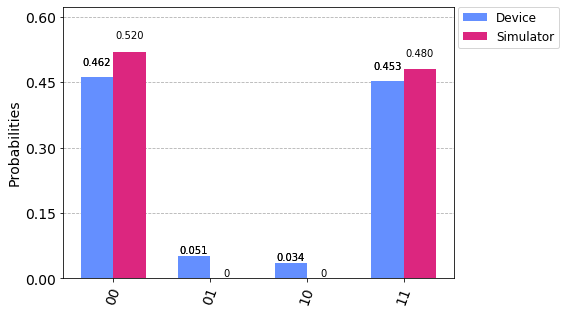

In [22]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])